In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [60]:
results = pd.read_csv('threshold-results.csv', header=None)

results.columns = [
    'method', 'run',
    *[f'{i}' for i in range(0, 50, 1)]
]

results['method'] = results['method'].str \
    .replace('pos_ratio:', '') \
    .replace('-pos:.*', '', regex=True)

In [61]:
results = results.loc[results['method'].isin(['1%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%'])]

### Average Threshold Plots

In [4]:
data = { 'method': [], 'epoch': [], 'threshold': [], 'run': [], 'col': [] }

for (idx, row) in results.iterrows():
    method = row[0]
    run = row[1]
    col = 'low' if method in ['0.5%', '1%', '2%', '5%'] else 'high'
    for epoch, val in enumerate(row[2:]):
        data['method'].append(method)
        data['epoch'].append(epoch)
        data['threshold'].append(val)
        data['run'].append(run)
        data['col'].append(col)
        
data = pd.DataFrame(data)     

In [5]:
data.method.value_counts()

10%    500
90%    500
30%    500
70%    500
60%    500
50%    500
20%    500
40%    500
80%    500
1%     250
Name: method, dtype: int64

In [6]:
plt.style.use(['ggplot', 'seaborn-whitegrid'])

In [7]:
plt.rcParams.clear()
params = {
    'figure.titlesize': 22,
    'figure.figsize': (18, 6),
    'legend.fontsize': 20,
    'font.size': 20,
    'legend.frameon': True,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'lines.markersize': 8,
    'legend.markerscale': 1.5,
    'axes.labelpad': 10,
    'legend.loc': 'upper left'
}
plt.rcParams.update(params)

In [8]:
data.loc[data.col == 'low', 'col'] = 'Priors < 10%'
data.loc[data.col == 'high', 'col'] = 'Priors >= 10%'
data.sort_values(by='method', inplace=True)
data.rename(columns={ 'method': 'Positive\n  Prior' }, inplace=True)

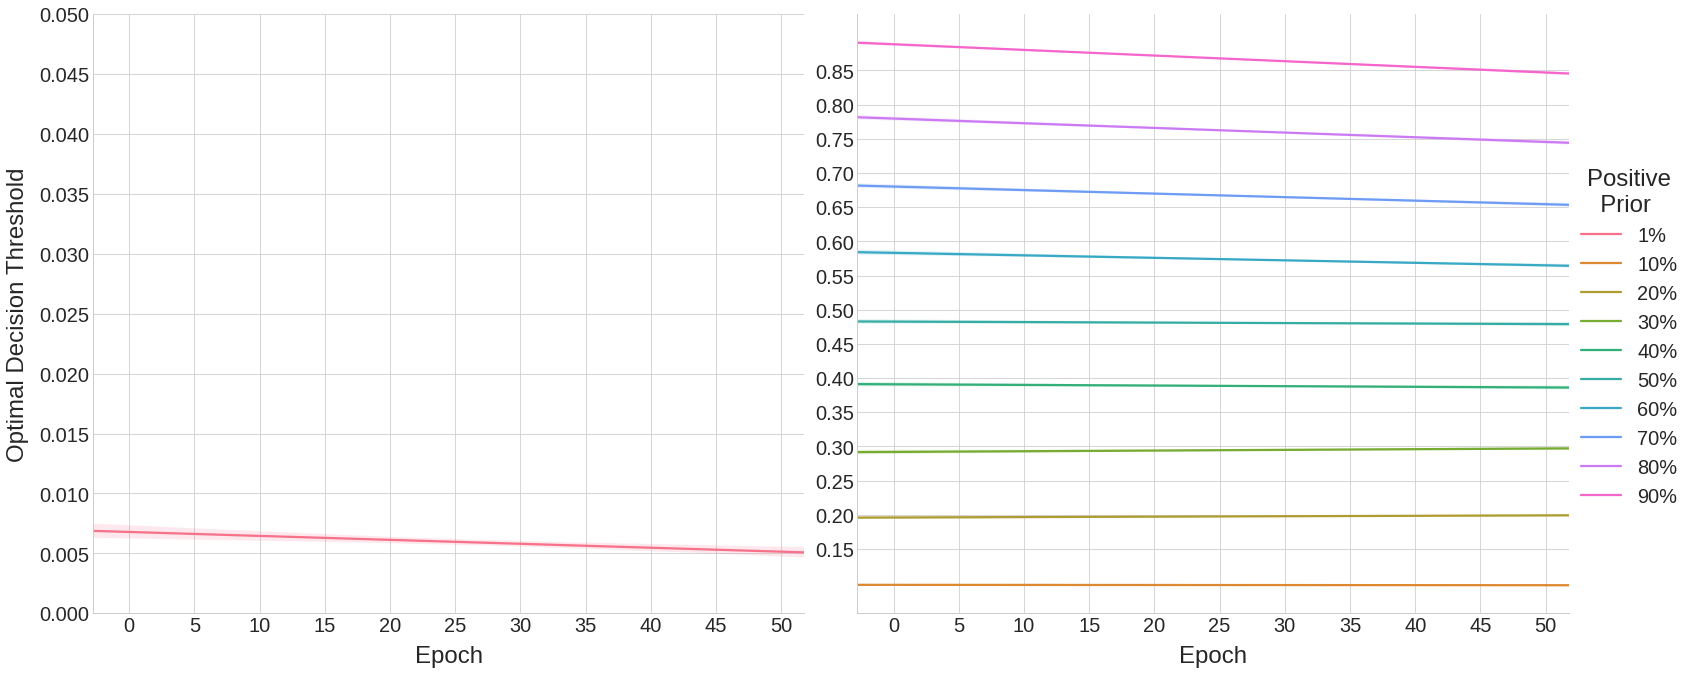

In [9]:
l1 = sns.lmplot(
    data=data, x='epoch', y='threshold', hue='Positive\n  Prior', col='col', col_order=['Priors < 10%', 'Priors >= 10%'],
    ci=95, scatter=False, height=10, aspect=1.1, sharey=False, legend_out=True)

axes = l1.axes
ax1, ax2 = axes[0]
ax1.set_xticks(np.arange(0, 51, 5));
ax1.set_ylim(0, 0.05);
ax1.set_yticks(np.arange(0.0, 0.051, 0.005))
ax2.set_yticks(np.arange(0.15, 0.9, 0.05))


l1.set_titles('');
l1.set_ylabels('Optimal Decision Threshold');
l1.set_xlabels('Epoch');

l1.set_titles('');

l1.savefig('ecbdl-optimal-thresholds.png')

### 3 Lines per Method

In [91]:
data = { 'method': [], 'epoch': [], 'threshold': [], 'run': [], 'repetition': [] }
methods = sorted(results['method'].unique())

for method in methods:
    rows = results.loc[results.method == method][:3]
    for idx, (_, row) in enumerate(rows.iterrows()):
        for epoch, val in enumerate(row[2:]):
            data['method'].append(method)
            data['epoch'].append(epoch)
            data['threshold'].append(val)
            data['run'].append(run)
            data['repetition'].append(idx)

data = pd.DataFrame(data)
data.head()

,method,epoch,threshold,run,repetition
0,1%,0,0.010,4,0
1,1%,1,0.005,4,0
2,1%,2,0.010,4,0
3,1%,3,0.010,4,0
4,1%,4,0.005,4,0


In [92]:
data['prior'] = data.method.str.replace('%', '', regex=False).astype(int)

data.sort_values(by='prior', ascending=False, inplace=True)

hue_label = 'Positive\nClass\nSize'
data.rename(columns={ 'method': hue_label }, inplace=True)

In [101]:
plt.rcParams.clear()
params = {
    'figure.titlesize': 22,
    'figure.figsize': (20, 8),
    'legend.fontsize': 20,
    'font.size': 20,
    'legend.frameon': True,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'lines.markersize': 8,
    'legend.markerscale': 1.5,
    'axes.labelpad': 10,
    'legend.loc': 'upper left'
}
plt.rcParams.update(params)
plt.style.use(['ggplot', 'seaborn-whitegrid'])
plt.rcParams.update(params)

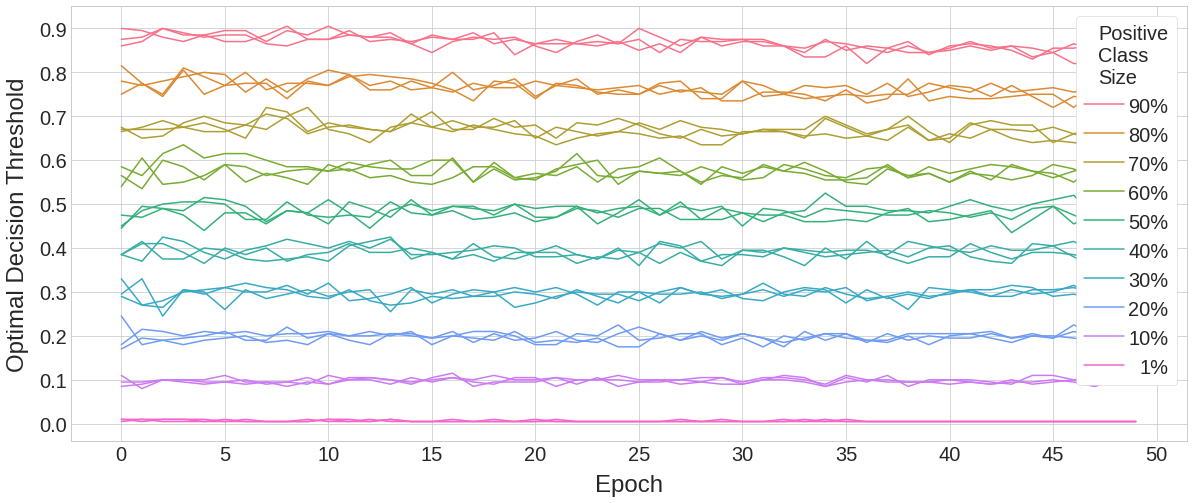

In [103]:
ax = sns.lineplot(data=data, x='epoch', y='threshold', hue=hue_label, units='repetition', estimator=None)

leg = plt.legend(loc='upper right', framealpha=1)
ax.set_xticks(range(0, 51, 5));
ax.set_yticks(np.arange(0.0, 1.0, 0.1));
ax.set_yticklabels(np.round(np.arange(0.0, 1.0, 0.1), decimals=1));
plt.ylabel('Optimal Decision Threshold');
plt.xlabel('Epoch');

hp = leg._legend_box.get_children()[1]
for vp in hp.get_children():
    for row in vp.get_children():
        row.set_width(85)  # need to adapt this manually
        row.mode= "expand"
        row.align="right"
        
ax.figure.savefig('ecbdl-optimal-thresholds-vs-epochs.png')
plt.show()